# Flight Price Prediction
***

## About the project

**Goals**
The main goal is to analyze the flight booking dataset obtained from “Ease My Trip” website and get meaningful information from it. 

**Obs**: 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets

**Questions**
- Does price vary with Airlines?
- Does ticket price change based on the departure time and arrival time?
- How the price changes with change in Source and Destination?
- How does the ticket price vary between Economy and Business class?

**About the data**
- Data was collected in two parts:
    - 1- Economy Class Tickets;
    - 2- Business Class Tickets.

## Loading Libraries and Data

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [147]:
business = pd.read_csv('business.csv')

In [148]:
economy = pd.read_csv('economy.csv')

## Exploratory Data Analysis - Part 1

### Business Data

#### Data types, missing data and duplicated data

The first thing we'll do is an initial analysis of the data to find out about the data types, missing data and duplicated data.

In [149]:
business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [150]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [151]:
business.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [152]:
any(business.duplicated())

False

- According to the info above, we can see that there's no missing or duplicated data in the dataset;
- All the variables that indicates a date are note in datetime type;
- Time taken variable has minutes (m) on it;
- Stop variable is not in a good format;
- Price variable is object typed;

#### Number of unique values per column

In [153]:
business.nunique()

date            49
airline          2
ch_code          2
num_code       264
dep_time       166
from             6
time_taken     373
stop            25
arr_time       176
to               6
price         2358
dtype: int64

### Economy Data

#### Data types, missing data and duplicated data

In [154]:
economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [155]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [156]:
economy.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [157]:
any(economy.duplicated())

True

- According to the info above, we can see that there's no missing data in the dataset;
- It seems that there are some duplicated date in the dataset;
- All the variables that indicates a data are note in datetime type;
- Time taken variable has minutes (m) on it;
- Price variable is object typed;

#### Number of unique values per column

In [158]:
economy.nunique()

date            49
airline          8
ch_code          8
num_code      1254
dep_time       251
from             6
time_taken     483
stop            37
arr_time       266
to               6
price         9819
dtype: int64

## Data Preprocessing - Part 1

#### Adding a new column "class" to each datast

In [159]:
economy['class'] = 'economy'

In [160]:
business['class'] = 'business'

#### Data joining

We'll join both datasets, so that we can analyse both of them together.

In [161]:
df = pd.concat([business, economy])

In [162]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


- According to the info above, we can see that there's no missing in the dataset;
- All the variables that indicates a date are note in datetime type;
- Time taken variable has minutes (m) on it;
- Stop variable is not in a good format;
- Price variable is object typed;

#### Changing from object to datetime type

In [164]:
#Removing all "-" from the date
df['date'] = df['date'].str.strip('-')

In [165]:
df['date'] = pd.to_datetime(df['date'])

#### Creating a new variable which contains the full code of the flight, since it was separated into categorical code and numerical code.

In [166]:
df['num_code'] = df['num_code'].apply(str)
df['flight_code'] = df['ch_code'] + df['num_code']

In [167]:
#Dropping the ch_code and num_code columns, since we now have a complete one
df.drop(columns = ['num_code', 'ch_code'], inplace = True)

#### Formating the time_taken variable

In [168]:
#Removing characters 'h' and 'm'
df['time_taken'] = df['time_taken'].str.replace('h','')

In [169]:
df['time_taken'] = df['time_taken'].str.strip('m')

In [170]:
#Separating time_taken into two other columns: hours and mins
df[['hours', 'mins']] = (df['time_taken'].str.split(' ', 1, expand=True))

In [171]:
# Converting from string to float
df['hours'] = df['hours'].astype(float)

In [172]:
# Converting from string to float
df['mins'] = (df['mins'].replace('','00')).astype(float)

In [173]:
#Converting from minutes to hours
df['time_taken'] = round(df['hours'] + (df['mins'] / 60), 2)

In [174]:
#Dropping the hours and mins columns, since we now have a complete time_taken one
df.drop(columns = ['hours', 'mins'], inplace = True)

#### Stop Column

In [175]:
#Replacing / removing unwanted characters
df['stop'] = df['stop'].str.replace('\n','')
df['stop'] = df['stop'].str.replace('\t','')
df['stop'] = df['stop'].str.replace('-stop','')
df['stop'] = df['stop'].str.replace('-stopVia','')
df['stop'] = df['stop'].str.replace('Via','')

In [176]:
df[['stop', 'stop_place']] = (df['stop'].str.split(' ', 1, expand=True))

In [177]:
df['stop'] = df['stop'].str.replace('non', '0') 

#### Converting the price column from string to integer

In [178]:
df['price'] = (df['price'].str.replace(',','')).astype(int)

In [179]:
df['dep_time'] = df['dep_time'].str.replace(':','')

In [180]:
df['arr_time'] = df['arr_time'].str.replace(':','')

## Exploratory Data Analysis - Part 2

In [181]:
df.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight_code,stop_place
0,2022-11-02,Air India,1800,Delhi,2.00,0,2000,Mumbai,25612,business,AI868,
1,2022-11-02,Air India,1900,Delhi,2.25,0,2115,Mumbai,25612,business,AI624,
2,2022-11-02,Air India,2000,Delhi,24.75,1,2045,Mumbai,42220,business,AI531,None
3,2022-11-02,Air India,2125,Delhi,26.50,1,2355,Mumbai,44450,business,AI839,None
4,2022-11-02,Air India,1715,Delhi,6.67,1,2355,Mumbai,46690,business,AI544,None


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         300261 non-null  datetime64[ns]
 1   airline      300261 non-null  object        
 2   dep_time     300261 non-null  object        
 3   from         300261 non-null  object        
 4   time_taken   300261 non-null  float64       
 5   stop         300261 non-null  object        
 6   arr_time     300261 non-null  object        
 7   to           300261 non-null  object        
 8   price        300261 non-null  int32         
 9   class        300261 non-null  object        
 10  flight_code  300261 non-null  object        
 11  stop_place   43370 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(9)
memory usage: 28.6+ MB


#### Airline X Number of flights

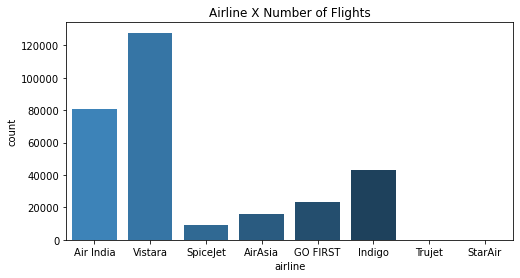

In [183]:
colors = ["#2986cc", "#2478b7", "#206ba3", "#1c5d8e", "#18507a", "#144366", "#103551", "#0c283d"]
plt.figure(figsize = (8,4))
sns.countplot(df['airline'], palette = colors)
plt.title('Airline X Number of Flights')
plt.show()

#### Airline X Price

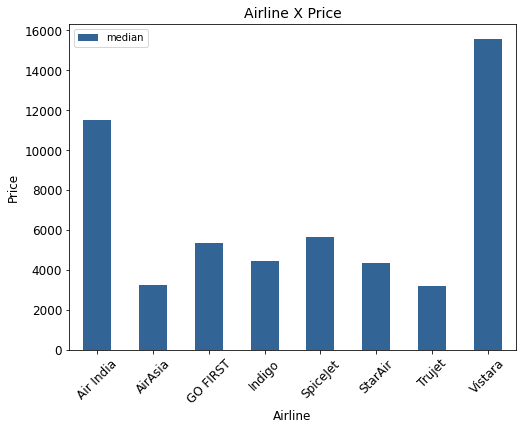

In [184]:
df.groupby(['airline'])['price'].agg(['median']).plot(kind = "bar", figsize = (8,6), fontsize = 12, color = ['#326496', '#92C4F6'])

plt.ylabel('Price', fontsize = 12)
plt.xlabel('Airline', fontsize = 12)
plt.xticks(rotation=45)
plt.title('Airline X Price', fontsize = 14)
plt.show()

#### Ticket Class X Number of Flights

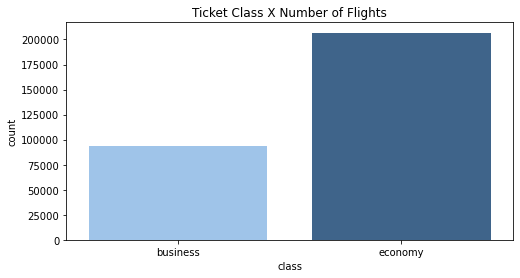

In [185]:
plt.figure(figsize = (8,4))
sns.countplot(df['class'], palette = ['#92C4F6','#326496'])
plt.title('Ticket Class X Number of Flights')
plt.show()

In [186]:
df.groupby(['airline','class'])['price'].agg(['median'])

median
airline   class            
Air India business  49613.0
          economy    6082.0
AirAsia   economy    3276.0
GO FIRST  economy    5336.0
Indigo    economy    4453.0
SpiceJet  economy    5654.0
StarAir   economy    4337.0
Trujet    economy    3196.0
Vistara   business  56588.0
          economy    6461.0

#### Ticket Class X Price

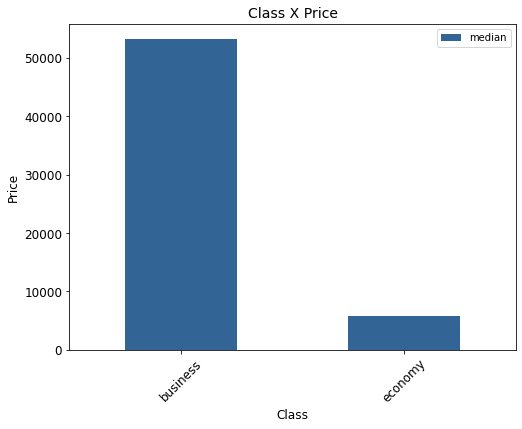

In [187]:
df.groupby(['class'])['price'].agg(['median']).plot(kind = "bar", figsize = (8,6), fontsize = 12, color = ['#326496', '#92C4F6'])

plt.ylabel('Price', fontsize = 12)
plt.xlabel('Class', fontsize = 12)
plt.xticks(rotation=45)
plt.title('Class X Price', fontsize = 14)
plt.show()

#### Origin X Number of Flights

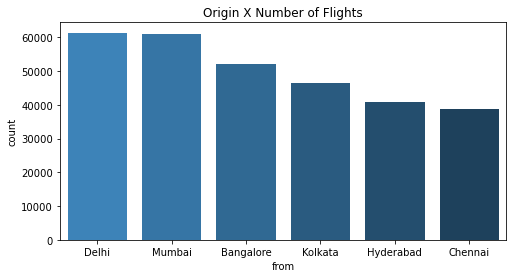

In [188]:
plt.figure(figsize = (8,4))
sns.countplot(df['from'], palette = colors)
plt.title('Origin X Number of Flights')
plt.show()

#### Destination X Number of Flights

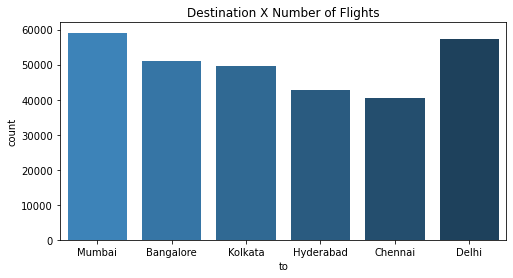

In [189]:
plt.figure(figsize = (8,4))
sns.countplot(df['to'], palette = colors)
plt.title('Destination X Number of Flights')
plt.show()

#### Price Variation Between Cities

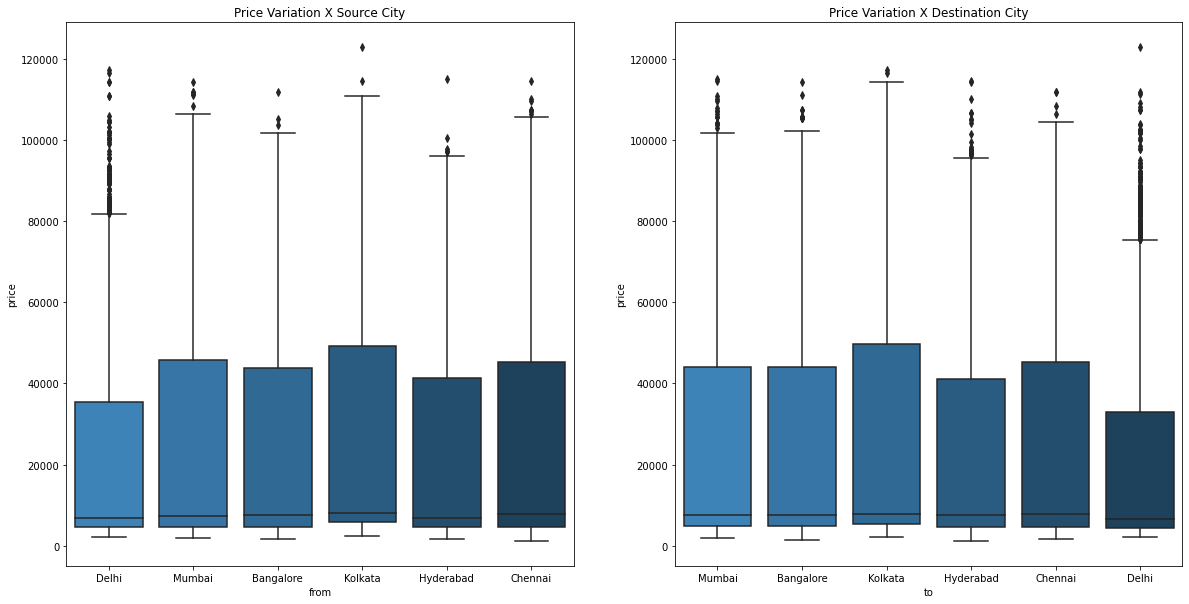

In [190]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.boxplot(x='from', y='price', data=df, ax=axes[0], palette = colors)
axes[0].set(title='Price Variation X Source City')

sns.boxplot(x='to', y='price', data=df, ax=axes[1], palette = colors)
axes[1].set(title='Price Variation X Destination City')
plt.show()

#### Price Variation Based On The Number Of Stops

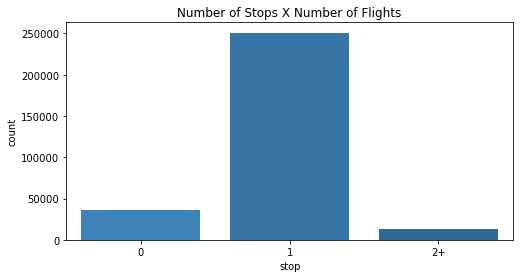

In [191]:
plt.figure(figsize = (8,4))
sns.countplot(df['stop'], palette = colors)
plt.title('Number of Stops X Number of Flights')
plt.show()

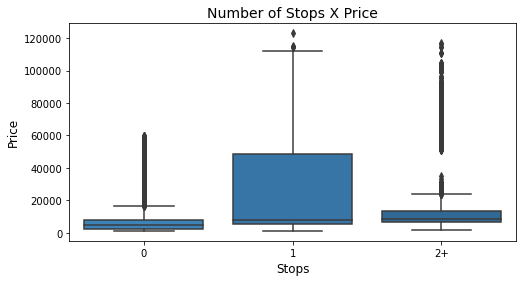

In [192]:
plt.figure(figsize = (8,4))
sns.boxplot(x='stop', y='price', data=df, palette = colors)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Stops', fontsize = 12)
plt.title('Number of Stops X Price', fontsize = 14)

plt.show()

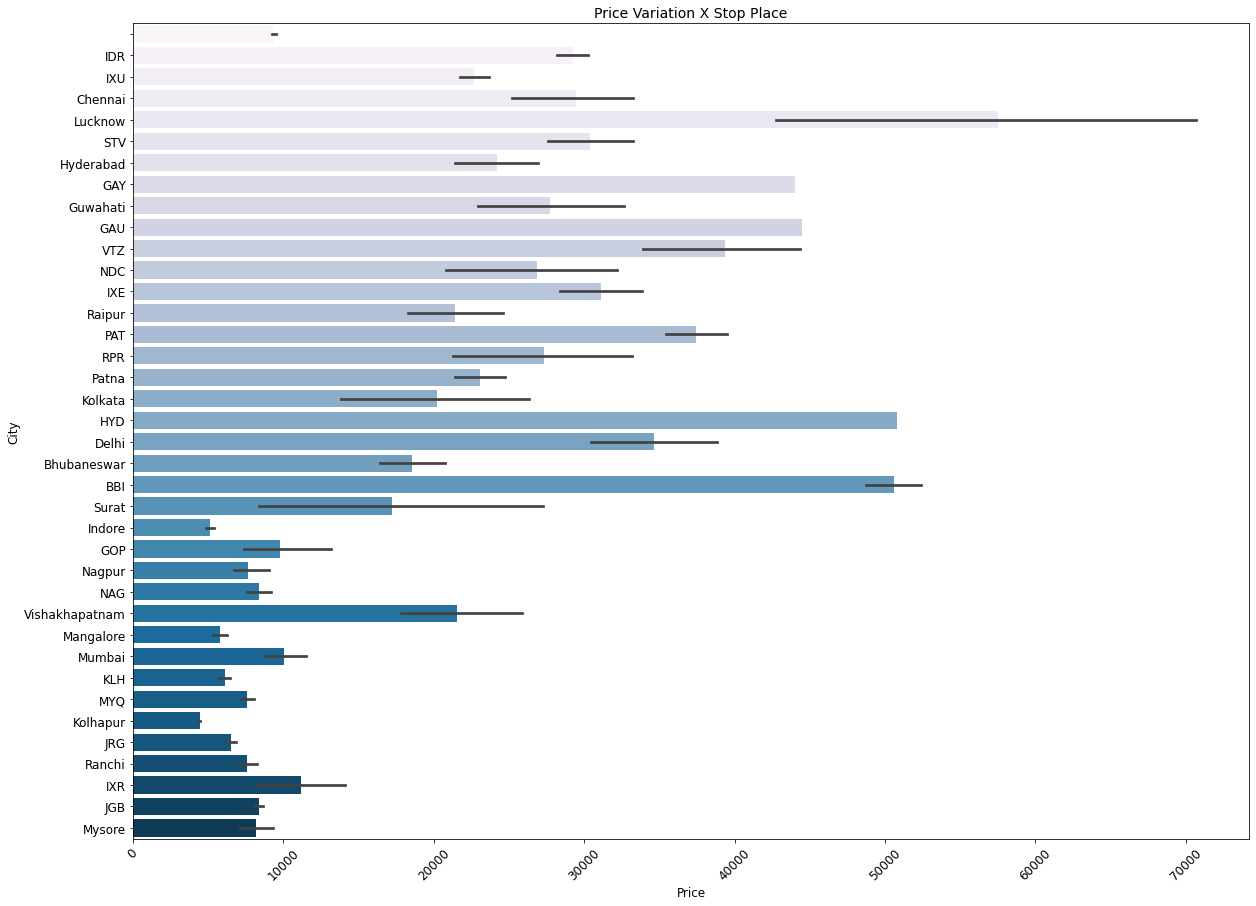

In [193]:
plt.figure(figsize = (20,15))
sns.barplot(x='price', y='stop_place', data=df, palette = "PuBu")
plt.ylabel('City', fontsize = 12)
plt.xlabel('Price', fontsize = 12)
plt.xticks(rotation=45)
plt.title('Price Variation X Stop Place', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### Conclusions

- Air India and Vistara are the most used airlines;
- Most airlines were used only in economy class, but Air India and Vistara have both economy and business use;
- Air India and Vistara usually are more expensive than the others airlines;
- Trujet and AirAsia usually have the lowest price;
- As expected, economy class tickets are cheaper than the business ones;
- The most common source and destination cities are Delhi and Mumbai;
- Flights from/to Kolkata and Chennai tends to be more expensive;
- As the number of stops increases, so does the price;

## Data Preprocessing - Part 2

#### Dealing with categorical data

In [194]:
cols = []
cols_num = []

#Creating a function that filter/finds objects:
def find_obj(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            cols.append(col)
        elif data[col].dtype == 'int':
            cols_num.append(col)
        elif data[col].dtype == 'float':
            cols_num.append(col)

find_obj(df)

In [195]:
cols

['airline',
 'dep_time',
 'from',
 'stop',
 'arr_time',
 'to',
 'class',
 'flight_code',
 'stop_place']

In [196]:
a = pd.get_dummies(df[cols])
data = df.drop(cols, axis = 1, inplace = True)
data = pd.concat([df, a], axis = 1)

In [206]:
data.head(10)

,date,time_taken,price,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,...,stop_place_Nagpur,stop_place_PAT,stop_place_Patna,stop_place_RPR,stop_place_Raipur,stop_place_Ranchi,stop_place_STV,stop_place_Surat,stop_place_VTZ,stop_place_Vishakhapatnam
0,2022-11-02,2.00,25612,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-11-02,2.25,25612,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-11-02,24.75,42220,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-11-02,26.50,44450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-11-02,6.67,46690,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2022-11-02,2.17,50264,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2022-11-02,17.75,50669,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2022-11-02,22.75,51059,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2022-11-02,17.92,51731,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2022-11-02,2.25,53288,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Scaling the data

In [198]:
X = data.drop(columns = ['price', 'date'], axis = 1)
y = data['price']

scaler = StandardScaler()
newX = scaler.fit_transform(X)

## Machine Learning - Part 1 | Linear Regression

In [203]:
Xc = sm.add_constant(newX)
model = sm.OLS(y, Xc)
model_v1 = model.fit()

In [204]:
model_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1704.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:19:17   Log-Likelihood:            -3.0518e+06
No. Observations:              300261   AIC:                         6.108e+06
Df Residuals:                  298148   BIC:                         6.130e+06
Df Model:                        2112                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.09e+04     15.813   1321.898      0.000    2.09e+04    2.09e+04
x1           505.7048     17.936     28.195      0.000     470.550     540.859
x2         -1.813e+15   5.94e+14     -3.052      0.002   -2.98e+15   -6.49e+14
x3         -2.376e+15   1.57e+15     -1.515      0.130   -5.45e+15    6.97e+14
x4          3.248e+14   7.52e+14      0.432      0.666   -1.15e+15     1.8e+15
x5         -8.771e+14   1.37e+15     -0.641      0.521   -3.56e+15     1.8e+15
x6         -1.223e+15    1.1e+15     -1.114      0.265   -3.38e+15     9.3e+14
x7         -5.499e+14   4.59e+14     -1.197      0.231   -1.45e+15    3.51e+14
x8         -3.482e+15   1.34e+15     -2.596      0.009   -6.11e+15   -8.53e+14
x9          1.163e+15   5.66e+14      2.053      0.040    5.29e+13    2.27e+15
x10         1.394e+15   4.31e+14      3.236      0.001     5.5e+14    2.24e+15
x11        -1.599e+15   8.53e+14     -1.874      0.061   -3.27e+15    7.33e+13
x12        -1.411e+14   4.02e+13     -3.505      0.000    -2.2e+14   -6.22e+13
x13        -1.226e+14    3.5e+13     -3.505      0.000   -1.91e+14    -5.4e+13
x14        -1.326e+15   7.25e+14     -1.828      0.068   -2.75e+15    9.55e+13
x15        -1.175e+15   8.18e+14     -1.435      0.151   -2.78e+15    4.29e+14
x16        -1.613e+15   1.12e+15     -1.435      0.151   -3.82e+15     5.9e+14
x17        -4.311e+15   1.19e+15     -3.623      0.000   -6.64e+15   -1.98e+15
x18         6.314e+13   2.84e+14      0.222      0.824   -4.94e+14    6.21e+14
x19        -2.108e+15   1.47e+15     -1.435      0.151   -4.99e+15    7.71e+14
x20        -1.607e+13   2.91e+14     -0.055      0.956   -5.87e+14    5.55e+14
x21        -9.191e+14    6.4e+14     -1.435      0.151   -2.17e+15    3.36e+14
x22        -3.563e+14   5.47e+14     -0.651      0.515   -1.43e+15    7.17e+14
x23         1.288e+14   1.31e+14      0.980      0.327   -1.29e+14    3.86e+14
x24         -3.94e+15   1.36e+15     -2.904      0.004    -6.6e+15   -1.28e+15
x25         1.724e+15   7.12e+14      2.422      0.015    3.29e+14    3.12e+15
x26         6.372e+15   2.53e+15      2.521      0.012    1.42e+15    1.13e+16
x27         3.259e+15    1.3e+15      2.517      0.012    7.21e+14     5.8e+15
x28        -1.282e+14   3.66e+13     -3.505      0.000      -2e+14   -5.65e+13
x29        -1.593e+14   4.55e+13     -3.505      0.000   -2.48e+14   -7.02e+13
x30         -2.95e+14   8.42e+13     -3.505      0.000    -4.6e+14    -1.3e+14
x31        -3.133e+14   8.94e+13     -3.505      0.000   -4.88e+14   -1.38e+14
x32        -2.583e+14   7.37e+13     -3.505      0.000   -4.03e+14   -1.14e+14
x33        -3.906e+14   1.11e+14     -3.505      0.000   -6.09e+14   -1.72e+14
x34        -4.521e+14   1.29e+14     -3.505      0.000   -7.05e+14   -1.99e+14
x35        -2.417e+14    6.9e+13     -3.505      0.000   -3.77e+14   -1.07e+14
x3